>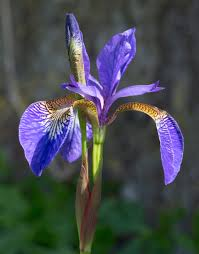

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

# plt.style.use('default')
color_pallete = ['#fc5185', '#3fc1c9', '#364f6b']
sns.set_palette(color_pallete)
sns.set_style("white")

In [ ]:
#importing the Iris dataset with pandas
dataset = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')
x = dataset.iloc[:, [0, 1, 2, 3]].values

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

In [ ]:
dataset.head()

> ### Visualization

In [ ]:
#2d plot
sns.FacetGrid(dataset, hue="species", height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

In [ ]:
#3d plot size by sepal_width
px.scatter_3d(dataset, x="petal_length", y="petal_width", z="sepal_length", size="sepal_width", 
              color="species", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

In [ ]:
#3d plot size by sepal_length
px.scatter_3d(dataset, x="petal_length", y="petal_width", z="sepal_width", size="sepal_length", 
              color="species", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

In [ ]:
#pairplot
sns.pairplot(dataset, hue="species", diag_kind="hist", markers=["o", "s", "D"])

In [ ]:
#correlation matrix plot
plt.figure()
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [ ]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 110):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 110), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 100, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

![](https://miro.medium.com/max/1280/1*rwYaxuY-jeiVXH0fyqC_oA.gif)

> ### Result

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')

plt.legend()